# Rachel Forbes - Data Science Project
#### February 21, 2021

In [5]:
# This project was created as a data science assessment and I will therefore not be sharing the data. 
# Some variable names have been changed
# Questions outlined below were part of the assessment and kept in the notebook for ease of interpretation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/Users/rachelforbes/Desktop/DataScienceProject.csv")

In [7]:
# Examine number of samples and variables
data.shape

(731, 13)

In [8]:
# Overview of data (head, types, missing values)
display(data.head())

,obs,date,season,holiday,weekDay,weather_condition,temp,feel_temp,humidity,visibility,children,adults,ticketsSold
0,1,1/1/2011,1,0,0,2,14.110847,18.18125,0.805833,10.749882,331,654,985
1,2,1/2/2011,1,0,0,2,14.902598,17.68695,0.696087,16.652113,131,670,801
2,3,1/3/2011,1,0,1,1,8.050924,9.47025,0.437273,16.636703,120,1229,1349
3,4,1/4/2011,1,0,1,1,8.200000,10.60610,0.590435,10.739832,108,1454,1562
4,5,1/5/2011,1,0,1,1,9.305237,11.46350,0.436957,12.522300,82,1518,1600


In [9]:
print(data.dtypes)

obs                    int64
date                  object
season                 int64
holiday                int64
weekDay                int64
weather_condition      int64
temp                 float64
feel_temp            float64
humidity             float64
visibility           float64
children               int64
adults                 int64
ticketsSold            int64
dtype: object


In [10]:
print(data.isna().sum())

obs                  0
date                 0
season               0
holiday              0
weekDay              0
weather_condition    0
temp                 0
feel_temp            0
humidity             0
visibility           0
children             0
adults               0
ticketsSold          0
dtype: int64


## 1. Preprocessing
### 1.1. Create the variables year and month.

In [11]:
# Convert data column to datetime type
data['date'] = data['date'].astype('datetime64[ns]')

In [12]:
data['date'].describe() # These are consecutive, there are 731 days between 2011-01-01 and 2012-12-31 which matches the count

count                     731
unique                    731
top       2012-02-14 00:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-31 00:00:00
Name: date, dtype: object

In [13]:
# Create new columns for year and month, respectively
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [14]:
# Set index to date
data.set_index('date', inplace=True)

### 1.2 Explain how you would handle missing values in the column feel_temp if there were any.

There are several options to deal with missing values. Before deciding what to do with missing values, I would check whether missingness is associated with the target variable (ticketsSold).
1. Remove missing values:
    - Depending on the percentage of missing values, I can entirely remove them from the dataset. If there are certain rows that contain many missing values they can be removed (listwise). If there are certain features that contain many missing values and aren't of particular interest for the goal of the analysis, they can be removed. 
2. Impute missing values:
    - Feel_temp is normally distributed and free from outliers (plotted below). Therefore, I could set the missing values to the mean of the feature. The median is less sensitive to the impact of outliers, and should be used if a feature contains many outliers. However, imputing the mean or median will distort the variance (there have been arguments that if missing data < 10% and correlations between features are low, this limitation doesn't hold).
    - Missing feel_temp values could be predicted by a linear regression model and imputed. However, this could lead to biased parameter estimates because the missing values are being predicted by other variables in the dataset.
    
In this case, if there was a low percentage of missing values in feel_temp I would remove the rows that contained missing values. Otherwise, I would fill the missing values with the mean of the feel_temp.

## 2. Descriptive Statistics

### 2.1 Describe up to three relevant variables.

In [15]:
describe_data = data[["ticketsSold", "temp", "humidity"]]
describe_data.describe()

,ticketsSold,temp,humidity
count,731.000000,731.000000,731.000000
mean,4504.348837,20.310776,0.627894
std,1937.211452,7.505091,0.142429
min,22.000000,2.424346,0.000000
25%,3152.000000,13.820424,0.520000
50%,4548.000000,20.431653,0.626667
75%,5956.000000,26.872077,0.730209
max,8714.000000,35.328347,0.972500


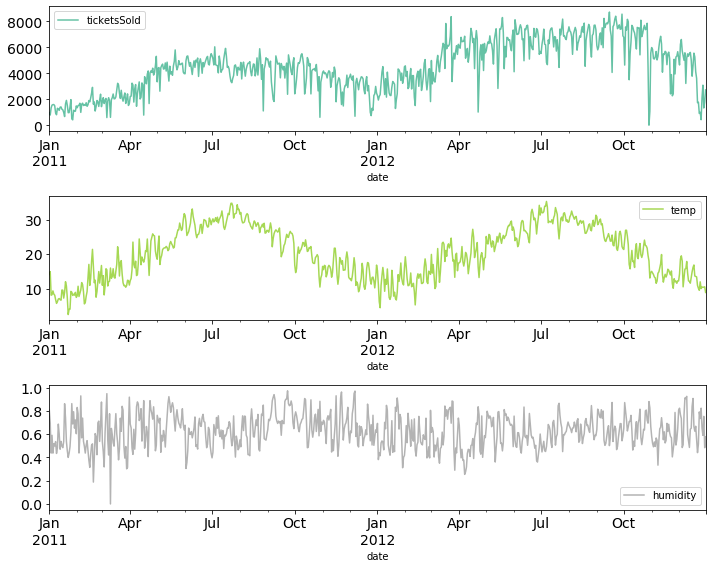

In [16]:
# Visualize ticketsSold, temp, humidity across time
describe_data.plot(subplots=True, layout=(3,1), sharex=False, sharey=False, figsize=(10,8), fontsize = 14, cmap="Set2")
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ad80be450>],
      dtype=object)

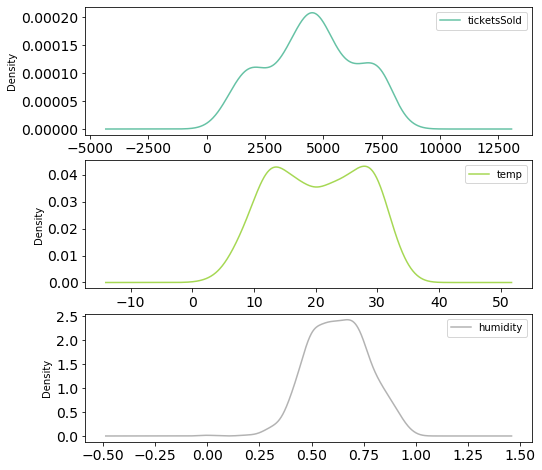

In [17]:
# Distribution of ticketsSold, temp, and humidity
describe_data.plot(kind='kde', subplots=True, layout=(3,1), sharex=False, sharey=False, figsize=(8,8), fontsize = 14, cmap="Set2")

Total tickets sold, temperature, and humidity are on very different scales. The range indicates the variables should be standardized before being including in a model.

Temperature seems to follow the same pattern as tickets sold and therefore is likely an important predictor of total tickets sold. Humidity does not show the same pattern and, interestingly, does not appear to be seasonal. I would expect humidity to be seasonal and therefore I'd want to follow up with additional questions about how this measure was collected to ensure it is reliable.

All three variables appear to be normally distributed.

### 2.2 Describe the relation between two pairs of variables using appropriate visuals (e.g.,histograms).

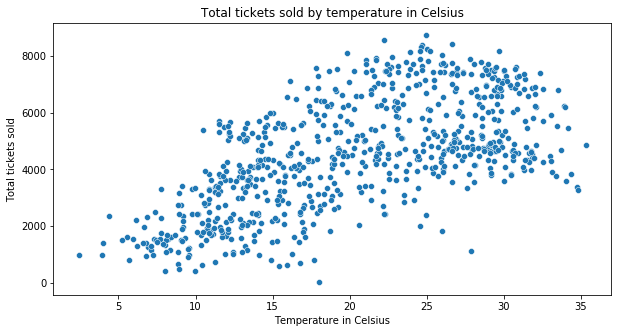

In [18]:
# ticketsSold and temperature
plt.figure(figsize=(10,5))
plt.title('Total tickets sold by temperature in Celsius')
plt.xlabel('Temperature in Celsius')
plt.ylabel('Total tickets sold')
sns.scatterplot(x='temp', y='ticketsSold', data=data)
plt.show()

Total tickets sold and temperature seem to be linearly related.

([<matplotlib.axis.XTick at 0x7f8ad7b11210>,
 <a list of 3 Text xticklabel objects>)

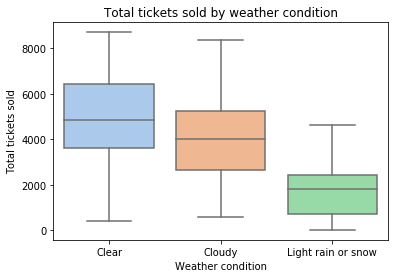

In [19]:
# ticketsSold and weather conditions
sns.set_palette("pastel")

sns.boxplot(x='weather_condition', y='ticketsSold', data=data)
plt.title('Total tickets sold by weather condition')
plt.xlabel('Weather condition')
plt.ylabel('Total tickets sold')
plt.xticks([0, 1, 2], ['Clear', 'Cloudy', 'Light rain or snow'])

The figure strongly suggests that tickets sold are lower in light rain or snow, though a test would be needed to provide statistical evidence of this effect.

### 2.3 Determine if outliers are present. Are there any? How should they be handled?

ticketsSold       AxesSubplot(0.125,0.657941;0.352273x0.222059)
temp           AxesSubplot(0.547727,0.657941;0.352273x0.222059)
feel_temp         AxesSubplot(0.125,0.391471;0.352273x0.222059)
humidity       AxesSubplot(0.547727,0.391471;0.352273x0.222059)
visibility           AxesSubplot(0.125,0.125;0.352273x0.222059)
dtype: object

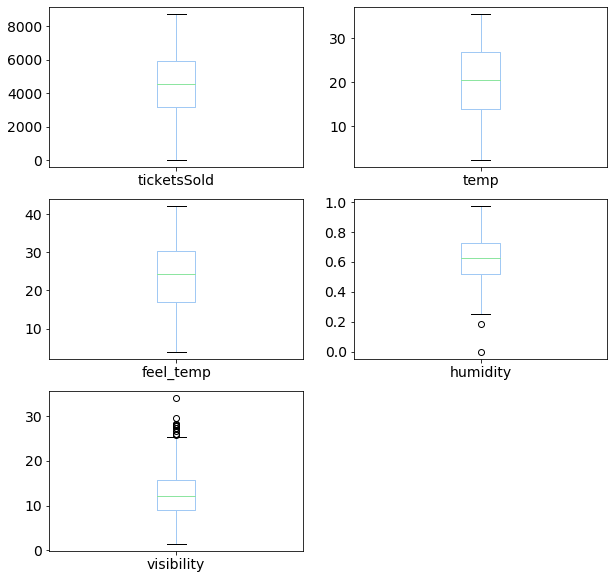

In [20]:
# Create boxplots to visually examine outliers
data[['ticketsSold', 'temp', 'feel_temp','humidity', 'visibility']].plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(10,10), fontsize = 14)

The boxplots illustrate that there are outliers in humidity and visibility. This is shown by the points drawn beyond the whisker, which represent points beyond Q3 + 1.5IQR or points less than Q1 - 1.5IQR.

Outliers can be important depending on the subject area. However, including them may make it more difficult to fit a model. There are very few outliers in this dataset (see percentages below). Therefore I will remove the outliers using the interquartile range rule.

In [21]:
# Humidity
Q1_humidity = data["humidity"].quantile(0.25)
Q3_humidity = data["humidity"].quantile(0.75)
IQR_humidity = Q3_humidity - Q1_humidity

# Visibility
Q1_visibility = data["visibility"].quantile(0.25)
Q3_visibility = data["visibility"].quantile(0.75)
IQR_visibility = Q3_visibility - Q1_visibility

In [22]:
# Percentage of outliers in data
outlier_count = data[(data['visibility'] >= (Q3_visibility + 1.5*IQR_visibility)) | (data['visibility'] <= (Q1_visibility - 1.5*IQR_visibility))].shape[0]

print('outliers in visibility: %.2f'% ((outlier_count/len(data))*100)+ "%")

outlier_count2 = data[(data['humidity'] >= (Q3_humidity + 1.5*IQR_humidity)) | (data['humidity'] <= (Q1_humidity - 1.5*IQR_humidity))].shape[0]
print('outliers in humidity: %.2f'% ((outlier_count2/len(data))*100) + "%")

outliers in visibility: 1.78%
outliers in humidity: 0.27%


In [23]:
# Subset data to remove outliers
data = data[data["humidity"] >= (Q1_humidity - (1.5 * IQR_humidity))] 
data = data[data["visibility"] <= (Q3_visibility + (1.5 * IQR_visibility))]

### 2.4 Demonstrate that the number of tickets sold varies according to the season.

In [24]:
# Examine means by season to explore whether number of tickets sold varies
data[['ticketsSold','season']].groupby(['season']).agg(['mean', 'count', 'std'])

ticketsSold                   
               mean count          std
season                                
1       2603.720930   172  1396.219810
2       5017.243094   181  1686.861628
3       5644.303191   188  1459.800381
4       4732.721591   176  1708.697284

Text(-2.450000000000003, 0.5, 'Season')

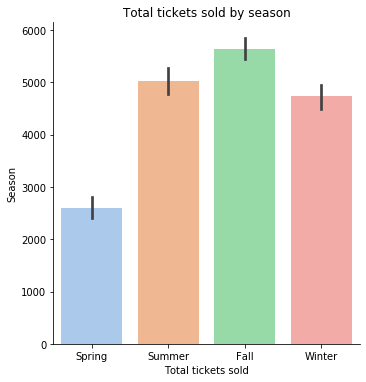

In [25]:
# Plot means by season
season_plot = sns.catplot(x="season", y="ticketsSold", kind="bar", data=data)
season_plot.set_xticklabels(["Spring", "Summer", "Fall", "Winter"])
plt.title('Total tickets sold by season')
plt.xlabel('Total tickets sold')
plt.ylabel('Season')

Visually I can see total tickets sold vary by season, but a statistical test will tell me if this difference is significant.

In [26]:
# Test whether number of tickets sold significantly differs by season (ANOVA)
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('ticketsSold ~ C(season)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

aov_table['eta_sq'] = aov_table[:-1]['sum_sq']/sum(aov_table['sum_sq'])
aov_table

,sum_sq,df,F,PR(>F),eta_sq
C(season),9.218466e+08,3.0,124.840203,5.433284e-65,0.34438
Residual,1.754981e+09,713.0,NaN,NaN,NaN


There is a significant difference in total tickets sold by season, but between which seasons? I can run pairwise comparison tests to compare each season to one another.

In [27]:
# Test pairwise contrasts with Tukey's honest significance test
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(data['ticketsSold'], data['season'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,2413.5222,0.001,1983.3169,2843.7274,True
1,3,3040.5823,0.001,2614.2973,3466.8672,True
1,4,2129.0007,0.001,1695.8281,2562.1732,True
2,3,627.0601,0.001,206.3462,1047.774,True
2,4,-284.5215,0.3176,-712.2128,143.1698,False
3,4,-911.5816,0.001,-1335.3293,-487.8339,True


Takeaways:
1. The number of tickets sold is significantly different across seasons
2. There are significantly fewer tickets sold in Spring than all other seasons
3. There are a similar number of tickets sold in Winter and Summer
4. There are significantly more tickets sold in Fall than all other seasons

## 3. Modelling

### 3.1 Use the modeling approach of your choice to predict the ticketsSold variable.

I will begin with a linear regression because it is a simple but often highly effective model. Additionally, this provides necessary baseline performance metrics to compare any more complex models.

#### Check Assumptions of Linear Regression

#### Linearity
Linear regression fits a linear equation to the data and therefore assumes the relationship between the IVs and DV to be linear. If the relationship is not linear, the model will likely not perform well. To check linearity, we can visualize the relationships with scatterplots.


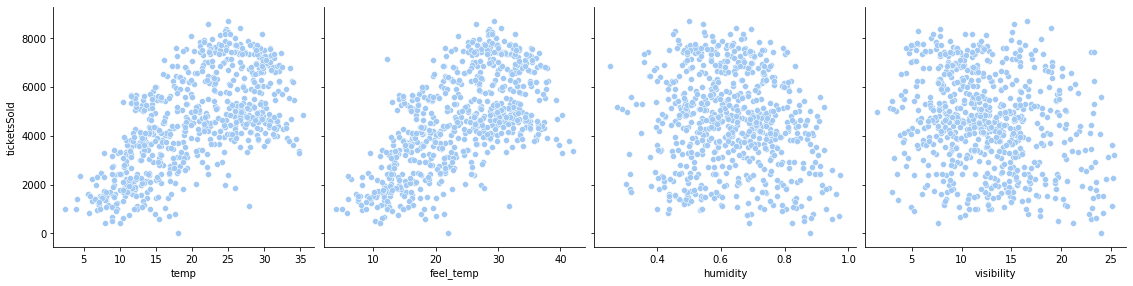

In [28]:
## Visualize the relationship between total tickets sold and continuous features
sns.pairplot(data, x_vars=['temp','feel_temp','humidity','visibility'], y_vars='ticketsSold', height=4, aspect=1)

Temp and feel_temp show a linear relationship with total tickets sold. However, the relationship between total tickets sold and humidity and visibility is less clear. Therefore, a linear model may not be able to efficently explain the variability in the data. 

#### Independent features
There should not be multicollinearity (correlated features) in a linear regression model. Regression coefficients represent the change in the DV for each IV when all other IVs are held constant. If features are highly correlated, it becomes very difficult for the model to estimate the independent effect on each IV to the DV because correlated IVs would change in unison.  

,ticketsSold,temp,feel_temp,humidity,visibility
ticketsSold,1.000000,0.625892,0.629204,-0.136621,-0.216193
temp,0.625892,1.000000,0.991738,0.114191,-0.140169
feel_temp,0.629204,0.991738,1.000000,0.126587,-0.166038
humidity,-0.136621,0.114191,0.126587,1.000000,-0.204496
visibility,-0.216193,-0.140169,-0.166038,-0.204496,1.000000


[Text(0, 0, 'ticketsSold'),
 Text(0, 0, 'temp'),
 Text(0, 0, 'feel_temp'),
 Text(0, 0, 'humidity'),
 Text(0, 0, 'visibility')]

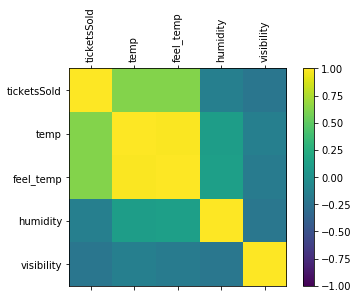

In [29]:
# Print correlation matrix
corr_data = data[['ticketsSold','temp','feel_temp','humidity','visibility']]
correlations = corr_data.corr()
display(correlations)

# Plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax= ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# Change tick labels
ticks = range(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_data.columns, rotation=90)
ax.set_yticklabels(corr_data.columns)

'feel_temp' and 'temp' are almost perfectly correlated (r = 0.99), and should not both be included in a linear regression model. Given that ticketsSold is likely more based on subjective temperature (though more domain experience would be helpful with this decision), I decided to not include temp in the model.

In [30]:
# Drop 'temp'
data = data.drop(['temp'], axis=1)

### Preparing data for regression

#### Encode Categorical Variables
Regression requires categorical variables to be dummy coded (0 or 1)

In [31]:
# holiday and weekDay are already binary coded 
data = pd.get_dummies(data, columns=['year','month','season','weather_condition'])

#### Scale features

Features should be scaled to make the coefficients interpretable and comparable to one another. This will allow me to rank my features by importance and ensuring the model can be fit correctly.

In [32]:
# Scaling between 0 and 1
data['feel_temp'] = (data['feel_temp'] - min(data['feel_temp'])) / (max(data['feel_temp']) - min(data['feel_temp']))
data['humidity'] = (data['humidity'] - min(data['humidity'])) / (max(data['humidity']) - min(data['humidity']))
data['visibility'] = (data['visibility'] - min(data['visibility'])) / (max(data['visibility']) - min(data['visibility']))
data['ticketsSold'] = (data['ticketsSold'] - min(data['ticketsSold'])) / (max(data['ticketsSold']) - min(data['ticketsSold']))

#### Subset into features and target

In [33]:
# Drop children, adults, and record index columns because I do not use those counts in the analysis
data = data.drop(['adults', 'children', 'obs'], axis=1)

In [34]:
# features
feat_cols = [col for col in data.columns if col != 'ticketsSold']
features = data[feat_cols]
X = features.values

In [35]:
# target
y = data[['ticketsSold']].values
y = y[:,0] # select data (ndim= 2 to ndim = 1)

#### Splitting data into train and test

In [36]:
# Split into train and test

# 20% of the data will be used for testing
test_size = 0.2
seed = 12

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(573, 26)
(573,)
(144, 26)
(144,)


### 3.2 Describe your results on the training set.

In [37]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
print('r2 score: %.3f'% r2_score(y_train, y_pred_train))
print('Mean squared error: %.3f'% mean_squared_error(y_train, y_pred_train))

r2 score: 0.839
Mean squared error: 0.008


The model shows a good fit to the data. The model explains ~84% of the variance in total tickets sold.

### 3.3 Predict the ticketsSold variable on a test set and discuss the results (under 200 words).

In [38]:
y_pred_test = model.predict(X_test)

r2 = r2_score(y_test, y_pred_test)
print('r2 score: %.3f'% r2)
print('Mean squared error: %.3f'% mean_squared_error(y_test, y_pred_test))

r2 score: 0.845
Mean squared error: 0.008


In [39]:
coef = list(zip(model.coef_, features))
coef.sort(reverse = True)
display(coef)

[(0.41242492540187126, 'feel_temp'),
 (0.11870679606151804, 'year_2012'),
 (0.0871963319510645, 'season_4'),
 (0.08377615629180354, 'weather_condition_1'),
 (0.07174767849541164, 'month_9'),
 (0.03723537112983635, 'month_5'),
 (0.03230554084759579, 'month_3'),
 (0.028273445151880943, 'weather_condition_2'),
 (0.024640165042633413, 'month_6'),
 (0.01918368003135658, 'month_10'),
 (0.014164155700206316, 'month_8'),
 (0.013862556903687186, 'weekDay'),
 (0.010420137862332843, 'month_4'),
 (0.010405393274799536, 'season_3'),
 (0.00993937197082326, 'season_2'),
 (-0.015256601397420824, 'month_2'),
 (-0.028854963187433677, 'month_7'),
 (-0.04025677118307745, 'month_1'),
 (-0.04998991867273329, 'holiday'),
 (-0.05925503559348318, 'month_12'),
 (-0.06607335774795788, 'month_11'),
 (-0.09351611797401659, 'visibility'),
 (-0.10754109719668692, 'season_1'),
 (-0.11204960144368474, 'weather_condition_3'),
 (-0.11870679606151824, 'year_2011'),
 (-0.12273616043867541, 'humidity')]

Using a linear regression, I can predict total tickets sold fairly well. R^2 indicates that ~84% of the variability in total tickets sold is explained by the regression model. However, R^2 increases for every independent variable added in the model. The current model has 26 features, which R^2 does not consider. I included a calculation for adjusted R^2 below, which penalises additional independent variables added to the model and adjusts the R^2 metric to prevent overfitting. Based on the performance on my test set, the model does not appear to be overfitting and adjusting for the number of features only slightly altered the R^2 value.

The mean squared error of the model was 0.008, which measures the average of the difference between the predicted ticketsSold count values and the true ticketsSold count values.

'feel_temp' is the most important predictor of total tickets sold in this model.

In [40]:
adj_r2 = 1 - ((1-(r2_score(y_test, y_pred_test)))*(len(data)-1)/(len(data)-len(features.columns)-1))
print('adjusted r2 score: %.3f'% adj_r2)
print('r2 score: %.3f'% r2)

adjusted r2 score: 0.839
r2 score: 0.845


### Checking assumptions of the model

#### Check for homoscedasticity
Residuals should be approximately equal variance across the regression line. I can check whether there is any pattern in the error terms by plotting the error against the predicted values.

Text(0, 0.5, 'Residual error of regression')

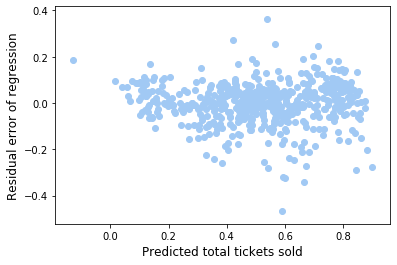

In [41]:
residuals = y_train - y_pred_train
plt.scatter(y_pred_train, residuals)
plt.xlabel('Predicted total tickets sold', fontsize=12)
plt.ylabel('Residual error of regression', fontsize=12)

The residuals appear to be homoscedastic (there is no clear pattern in the scatterplot).

In [42]:
# Goldfeld Quandt Test to check for homoscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.1058612101405856), ('p-value', 0.20729063421509225)]

Good. Goldfeld Quandt Test has a p value > 0.05. Therefore, I cannot reject the null hypothesis that error terms are homoscedastic. This indicates that the variance of the error is the same across observations.

#### Check for normality of residuals

Text(0.5, 1.0, 'Normality of error terms/residuals')

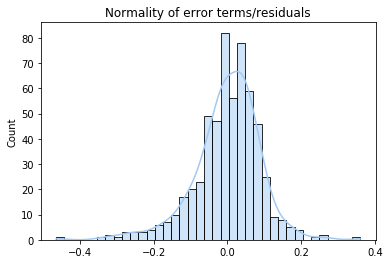

In [43]:
sns.histplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')

Error terms appear normal from the histogram but there is a long tail of the distribution which should be examined further.

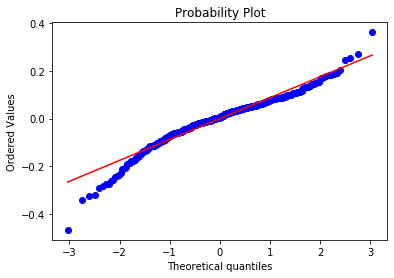

In [44]:
from scipy import stats
import pylab

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

A QQ plot, which shows whether the observed distribution matches a normal distribution, illustrates that the data does have heavier tails than would be expected in a normal distribution. This is confirmed with the Shapiro–Wilk test of normality shown below.

In [45]:
shapiro_test = stats.shapiro(residuals)
name = ['statistic', 'p-value']
lzip(name, shapiro_test)

[('statistic', 0.954013466835022), ('p-value', 2.2367004082202158e-12)]

### 3.4 Explain why you chose this model, discuss its strengths and weaknesses, and how you would improve its performance (under 300 words).

I used a linear regression model to have a simple baseline model. Linear regression is easy to implement and interpret and often provides good results. Additionally, this provides baseline metrics to compare any more sophisticated models. However, it requires a linear relationship and therefore may be prone to underfitting. 

In this model I included all features, though it is likely that the perfomance would be similar when only including a subset of the features that are highly predictive of total tickets sold. To maintain performance and potentially improve the generalizability of the model, I can use recursive feature elimination to reduce the number of features.

To improve the accuracy of model performance metrics, I can apply a cross validation technique (kfolds) which allows me to train on multiple train-test splits. 

In [46]:
# Regression with kfolds and recursive feature elimination

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# cross validation
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(1, 27))}]

# grid search
model = LinearRegression()
model.fit(X_train, y_train)
rfe = RFE(model)             

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 10 folds for each of 26 candidates, totalling 260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    4.3s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)

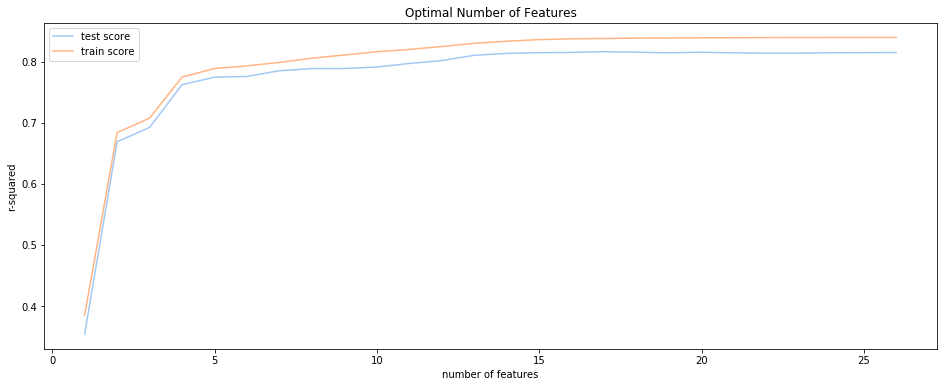

In [48]:
# plotting cv results to examine number of features to use in the model
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

Here I can see that only ~5 features explains most of the variance in the model.

In [49]:
# final model with 5 optimal features
n_features_optimal = 5

model2 = LinearRegression()
model2.fit(X_train, y_train)

rfe = RFE(model2, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred_model2 = model2.predict(X_test)
r2 = r2_score(y_test, y_pred_model2)
print('r2 score: %.3f'% r2)

r2 score: 0.845


Using only the top 5 predictors, I can obtain similar model performance.

### Random Forest model
I also ran a random forest model to compare the performance of my linear regression to a more complex model. Random forest are very versatile and do not rely on some assumptions necessary for linear regression (e.g., linear relationships). However, they are not interpretable and are prone to overfitting. 

In [50]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=1).fit(X_train, y_train)

RF.predict(X_test)
RFscore_train = RF.score(X_train, y_train)
RFscore = RF.score(X_test, y_test)
print('Train score: %.3f'% RFscore_train)
print('Test score: %.3f'% RFscore)

Train score: 0.981
Test score: 0.866


As shown by the R^2 scores above, the model performed well (~87% of the variance is explained by the model), but the model overfit the data (indicated by the performance drop between the train and test data).

In [51]:
from sklearn.model_selection import cross_val_score

folds= KFold(n_splits = 10) # folding data into 10 peices
cv_results= cross_val_score(RF, X_train, y_train, cv=folds, scoring='r2')
print("R2: %.3f(%.3f)" % (cv_results.mean(), cv_results.std()))

R2: 0.854(0.056)


Applying a cross-validation technique on the training data made overfitting less likely.